In [2]:
import numpy as np

# Define Q-table with zeros
Q = np.zeros((6, 3))

# Define simulation parameters
num_iterations = 10000
gamma = 0.8
alpha = 0.1

# Define reward function
def get_reward(state, action):
    if state == 0 and action == 0:
        return 0.1
    elif state == 1 and action == 1:
        return 1.0
    elif state == 2 and action == 2:
        return 1.0
    elif state == 3 and action == 1:
        return 1.0
    elif state == 4 and action == 0:
        return 0.5
    elif state == 5 and action == 2:
        return 0.5
    else:
        return 0.0

# Define function to choose action based on epsilon-greedy policy
def choose_action(state, epsilon=0.1):
    if np.random.uniform(0, 1) < epsilon:
        # choose random action
        return np.random.choice([0, 1, 2])
    else:
        # choose action with highest Q-value for current state
        return np.argmax(Q[state, :])

# Define function to get next state based on current state and action
def get_next_state(state, action):
    if action == 0:
        # do nothing
        return state
    elif action == 1:
        # switch to next phase
        return (state + 1) % 6
    elif action == 2:
        # switch to previous phase
        return (state - 1) % 6

# Define function to update Q-table
def update_q_table(state, action, reward, next_state):
    max_q_next = np.max(Q[next_state, :])
    Q[state, action] += alpha * (reward + gamma * max_q_next - Q[state, action])

# Define function to get current state
def get_state():
    # return random state
    return np.random.choice([0, 1, 2, 3, 4, 5])

# simulation loop
for i in range(num_iterations):
    state = get_state()
    action = choose_action(state)
    reward = get_reward(state, action)
    next_state = get_next_state(state, action)
    update_q_table(state, action, reward, next_state)
    
    # print Q-table every 1000 iterations
    if i % 1000 == 0:
        print("Q-table after {} iterations:".format(i))
        print(Q)


Q-table after 0 iterations:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Q-table after 1000 iterations:
[[0.47860867 0.26245072 0.29214762]
 [0.22779052 2.68252879 0.35666961]
 [0.3322091  0.30111531 2.74489943]
 [0.37915103 0.86372093 1.74076918]
 [2.39933325 0.52298541 0.32346794]
 [0.4159772  0.19723047 2.37725752]]
Q-table after 2000 iterations:
[[0.9602467  3.89006129 1.98750043]
 [1.46496471 4.88797748 0.76220769]
 [2.15463472 0.74454156 4.88757023]
 [1.05428761 2.15500064 3.89771416]
 [2.49483442 1.02835563 1.43242782]
 [1.30234988 1.08500146 2.49470715]]
Q-table after 3000 iterations:
[[1.75646569 3.99566059 1.99140364]
 [2.49089318 4.99552963 1.89301979]
 [2.89678347 1.40128105 4.99539423]
 [1.9200785  2.59500187 3.99522489]
 [2.49979616 1.29142984 2.24816026]
 [1.58766933 1.80749334 2.4997766 ]]
Q-table after 4000 iterations:
[[2.70140177 3.99982133 2.04637283]
 [3.34986114 4.9998057  2.42770586]
 [3.27603508 2.24378402 4.99979818]
 [2.26667676 2.8

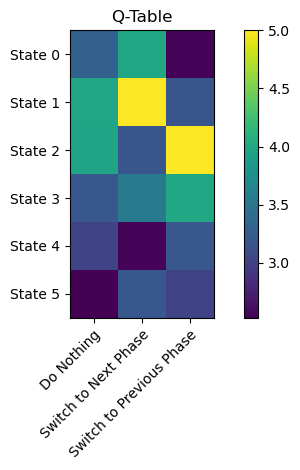

In [4]:
# import numpy as np
import matplotlib.pyplot as plt

# Define Q-table with zeros
Q = np.zeros((6, 3))

# Define simulation parameters
num_iterations = 10000
gamma = 0.8
alpha = 0.1

# Define reward function
def get_reward(state, action):
    if state == 0 and action == 0:
        return 0.1
    elif state == 1 and action == 1:
        return 1.0
    elif state == 2 and action == 2:
        return 1.0
    elif state == 3 and action == 1:
        return 1.0
    elif state == 4 and action == 0:
        return 0.5
    elif state == 5 and action == 2:
        return 0.5
    else:
        return 0.0

# Define function to choose action based on epsilon-greedy policy
def choose_action(state, epsilon=0.1):
    if np.random.uniform(0, 1) < epsilon:
        # choose random action
        return np.random.choice([0, 1, 2])
    else:
        # choose action with highest Q-value for current state
        return np.argmax(Q[state, :])

# Define function to get next state based on current state and action
def get_next_state(state, action):
    if action == 0:
        # do nothing
        return state
    elif action == 1:
        # switch to next phase
        return (state + 1) % 6
    elif action == 2:
        # switch to previous phase
        return (state - 1) % 6

# Define function to update Q-table
def update_q_table(state, action, reward, next_state):
    max_q_next = np.max(Q[next_state, :])
    Q[state, action] += alpha * (reward + gamma * max_q_next - Q[state, action])

# Define function to get current state
def get_state():
    # return random state
    return np.random.choice([0, 1, 2, 3, 4, 5])

# simulation loop
for i in range(num_iterations):
    state = get_state()
    action = choose_action(state)
    reward = get_reward(state, action)
    next_state = get_next_state(state, action)
    update_q_table(state, action, reward, next_state)
    
# Generate heatmap of Q-table
fig, ax = plt.subplots()
im = ax.imshow(Q)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(['Do Nothing', 'Switch to Next Phase', 'Switch to Previous Phase'])))
ax.set_yticks(np.arange(len(['State 0', 'State 1', 'State 2', 'State 3', 'State 4', 'State 5'])))
ax.set_xticklabels(['Do Nothing', 'Switch to Next Phase', 'Switch to Previous Phase'])
ax.set_yticklabels(['State 0', 'State 1', 'State 2', 'State 3', 'State 4', 'State 5'])

# Rotate tick labels and set axis titles
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Q-Table")
fig.tight_layout()
plt.show()


This code is an implementation of the Q-learning algorithm for a simple traffic light control problem. The goal is to learn the optimal action to take at each state (traffic light phase) in order to maximize the total reward obtained over time.

The Q-learning algorithm uses a Q-table to store the expected reward for each state-action pair. The algorithm updates the Q-table after each action based on the observed reward and the expected reward for the next state-action pair.

In this implementation, the Q-table has 6 rows (corresponding to the 6 possible traffic light phases) and 3 columns (corresponding to the 3 possible actions: do nothing, switch to next phase, or switch to previous phase). The algorithm randomly selects a starting state and takes actions based on an epsilon-greedy policy (with a small probability of taking a random action instead of the action with the highest expected reward). The algorithm updates the Q-table after each action using the Q-learning update rule:

Q(s, a) = Q(s, a) + alpha * (r + gamma * max(Q(s', a')) - Q(s, a))

where Q(s, a) is the expected reward for taking action a in state s, alpha is the learning rate, r is the observed reward for taking action a in state s, gamma is the discount factor, and max(Q(s', a')) is the expected reward for the best action a' in the next state s'.

Finally, the code generates a heatmap of the Q-table to visualize the expected reward for each state-action pair. The heatmap shows the expected reward for each combination of state and action as a colored square. The color represents the value of the expected reward, with darker colors indicating higher values. The row labels represent the traffic light phases (states) and the column labels represent the possible actions.

# In the code below, I was just trying to get the graphics and animate it

In [5]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the custom environment class
class TrafficLightEnv(gym.Env):
    def __init__(self):
        # Define the action space and observation space
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(low=0, high=1, shape=(6,))

        # Initialize the state variables
        self.car_positions = np.zeros(3)
        self.light_position = 0
        self.time = 0

    def reset(self):
        # Reset the environment to its initial state
        self.car_positions = np.zeros(3)
        self.light_position = 0
        self.time = 0
        return self._get_obs()

    def step(self, action):
        # Take an action in the environment and return the new state, reward, and whether the episode has ended
        reward = self._get_reward()
        done = False

        # Update the state variables
        self.car_positions += 1
        self.car_positions[self.light_position] -= 1

        if action == 0:
            self.light_position = 0
        else:
            self.light_position = 1

        self.time += 1

        # Check if the episode has ended
        if self.time >= 100:
            done = True

        return self._get_obs(), reward, done, {}

    def render(self):
        # Render the environment to the screen, if applicable
        pass

    def _get_obs(self):
        # Get the current observation
        return np.concatenate([self.car_positions, [self.light_position], [self.time]])

    def _get_reward(self):
        # Get the current reward
        if self.car_positions[2] == 0:
            return 1
        else:
            return 0

# Create an instance of the environment
env = TrafficLightEnv()

# Define the update function for the animation
def update(frame):
    # Take a step in the environment
    action = np.random.randint(2)
    obs, reward, done, _ = env.step(action)

    # Update the plot
    plt.cla()
    plt.xlim(-1, 10)
    plt.ylim(-1, 1)
    plt.axvline(x=0, color='k')
    plt.axvline(x=3, color='k')
    plt.axvline(x=6, color='k')
    plt.axvline(x=9, color='k')
    plt.scatter(env.car_positions, [0, 0, 0], marker='s', s=100)
    if obs[3] == 0:
        plt.axvspan(0, 3, color='red', alpha=0.5)
    else:
        plt.axvspan(6, 9, color='red', alpha=0.5)

# Create the animation
ani = FuncAnimation(plt.gcf(), update, frames=100, interval=100)

# Show the animation
plt.show()


<Figure size 640x480 with 0 Axes>